# Лабораторная работа. Преобразование Фурье

В предыдущих работах было изучено, что такое сигнал. Мы знаем, что *сигнал* - это физический процесс во времени, параметры которого изменяются в соответствии с передаваемым сообщением. В данной работе изучим переход между временной и частотной областями для дискретных сигналов.

## Теория

### Ряд Фурье

Ряд Фурье — представление функции $f$ с периодом $\tau$  в виде ряда

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

Этот ряд может быть также записан в виде
$$
f(x) = \sum_{k = -\infty}^{+ \infty} \hat{f}_k e^{ik2\pi x/\tau}
$$

где

$A_k$ — амплитуда $k$-го гармонического колебания,
$k \frac{2\pi}{\tau}=k\omega$ — круговая частота гармонического колебания,
$\theta _{k}$ — начальная фаза $k$-го колебания,
$\hat {f}_{k}$ — $k$-я комплексная амплитуда.

В более общем виде, рядом Фурье элемента некоторого пространства функций называется разложение этого элемента по полной системе ортонормированных функций или другими словами по базису, состоящему из ортогональных функций. В зависимости от используемого вида интегрирования говорят о рядах Фурье — Римана, Фурье — Лебега и т. п.

Пример, прямоугольный сигнал с центром в точке $x=0$.

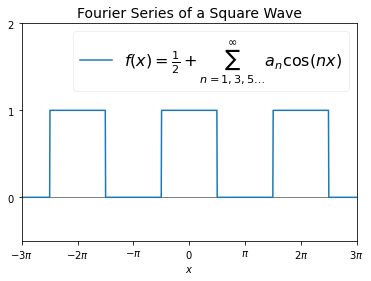

In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline


pi = np.pi
x = np.linspace(-3*pi, 3*pi, 1000)

plt.axhline(0, color='gray', lw=1)
plt.plot(x, 0.5 + 0.5 * signal.square(x + pi/2), lw=1.5,
         label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.rcParams['figure.figsize'] = (11, 4)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.show()

Перепишем уравнение ряда Фурье

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n \omega_0 x) + b_n \sin(n \omega_o x)
$$

где

$$
\omega_0 =\frac{2\pi}{T}
$$

$T$ — основной период (для приведенной выше прямоугольной волны $T=2\pi$

Уравнение для $a_n$:

$$
a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x)\cos(n \omega_0 x)dx
$$

Для приведенной выше прямоугольной волны ограничения составляют только от $-T/4$ до $T/4$, потому что $f(x)=0$ для остальной части длины волны.

$$
a_n = \frac{2}{T} \int_{-T/4}^{T/4}\cos(n \omega_0 x)dx
$$

Поскольку используется $\cos(nx)$, можно уменьшить пределы от $0$ до $T/4$ и умножить на $2$

$$
a_n = \frac{4}{T} \int_{0}^{T/4}\cos(n \omega_0 x)dx
$$

$$
a_n = \frac{4}{n \omega_0 T} \sin(n \omega_0 x)\bigg|^{T/4}_0  =\frac{4}{n \omega_0 T}\sin \left( n\omega_0 \frac{T}{4} \right)
$$

$$
a_n =\frac{2}{n\pi}\sin \left(n \omega_0 \frac{\pi}{2} \right)
$$

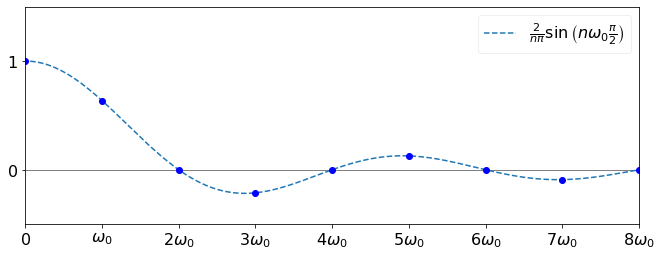

In [9]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--', label=r'$\frac{2}{n\pi}\sin \left( n\omega_0 \frac{\pi}{2} \right)$')
an = [2/(n*pi) * np.sin(n * pi/2) for n in range(1, 10)]
plt.plot(0, 1, 'bo')
plt.plot(range(1, 10), an, 'bo')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$',
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### Прямое преобразование Фурье

Чтобы преобразовать сигнал из временной области в частотную и обратно необходимо выполнить операцию под названием дискретное **преобразование Фурье**.

Запишем формулу прямого преобразования Фурье для дискретной последовательности $x(nT)$. Прямым дискретным преобразованием Фурье (ДПФ) называется преобразование последовательности  `x(n), n = 0, ... , N–1` в последовательность `X(k), k = 0, ..., N–1` по следующей формуле:

$X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk}$

где $k = 0, ..., N-1$.

- $N$ – количество компонент разложения, число измеренных за период значений сигнала;
- $n$ – номер отсчета дискретизированного сигнала, n = 0,1, ... , N–1;
- $k$ – номер гармоники компонента преобразования, а T — период времени, в течение которого брались входные данные;
- $W = e^{-2\pi j / N}$ – поворотный множитель.

В этой формуле $X(kT) = X(e^{j\omega T})$ является спектральной плотностью (спектром) дискретной последовательности. Выражение для спектра дискретной последовательности можно найти, заменив в её Z-форме переменную $z = e^{j\omega T}$

Для аналоговых сигналов выражение суммы превращается в интеграл.

Используя **формулу Эйлера** $e^{j\omega T} = cos(\omega T) + j\cdot sin(\omega T)$, можно определить *вещественную* и *мнимую* составляющие, а также **модуль** и **аргумент** спектральной плотности, которые связаны с вещественной и мнимой частями спектра через формулы теории функции комплексного переменного.

Модуль:

$|X(kT)| = \sqrt{Re(X)^2 + Im(X)^2}$

Фаза:

$arg(X(kT)) = \arctan{\frac{Im(X)}{Re(X)}}$

Таким образом, ДПФ для $N$ входных отсчетов сигнала ставит в соответствие N спектральных отсчётов. Из формулы ДПФ для вычисления одного спектрального отсчета требуется N операций комплексного умножения и сложения. Поскольку таких операций $N$, то общая вычислительная сложность ДПФ равна $N^2$

### Теорема Найквиста-Котельникова

Для сигнала, представленного последовательностью дискретных отсчетов, точное восстановление возможно, только если частота дискретизации более чем в 2 раза выше максимальной частоты в спектре сигнала.

Любую функцию $F(t)$, состоящую из частот от 0 до $f_1$, можно непрерывно передавать с любой точностью при помощи чисел, следующих друг за другом менее чем через $\frac{1}{2f_1}$ секунд.

Из сказанного следует, что восстановить без искажений можно только сигнал, спектр которого ограничен некоторой частотой **Fв** (частота Найквиста).

Однако, теоретически все реальные сигналы имеют бесконечные спектры. Спектры реальных сигналов, хотя и не бесконечны, но могут быть очень широкими. Для того чтобы при дискретизации избежать искажений, вызванных этим обстоятельством, сигнал вначале пропускают через фильтр, подавляющий в нем частоты, превышающие заданное значение **Fв**, и лишь затем производят дискретизацию:

Как следует из теоремы **Найквиста-Котельникова**, ДПФ точно соответствует непрерывному преобразованию Фурье, если преобразуемая функция есть функция с ограниченным спектром, при этом частота дискретизации **Fд** должна быть не меньше удвоенной максимальной частоты спектра **Fв**. Следует отметить, что для ДПФ справедливы правила и свойства, которые были рассмотрены для Z-преобразования. Матрицей `k * n` элементов можно определить ДПФ.

### Обратное преобразование Фурье

**Обратное дискретное преобразование Фурье** (ОДПФ) есть перевод последовательности `X(k), k = 0, ..., N–1` в последовательность `x(n), n = 0, ... , N–1` по формуле:

$x(nT) = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot e^{(2\pi j\cdot nk/N)} = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot W^{nk}$  


где `x(n)` –  измеренная последовательность в дискретных временных точках, значения которой являются исходными данными для прямого преобразования и выходными для обратного
`X(k)` – N–последовательность комплексных амплитуд синусоидальных сигналов, образующих исходный сигнал `x(n)`; значения последовательности являются выходными данными для *прямого* преобразования и входными для *обратного*

Поскольку амплитуды спектральных отсчетов - комплексные величины, то по ним можно вычислить одновременно и амплитуду, и фазу сигнала.

### Свойства дискретного преобразования Фурье

1. **Линейность**: сумма спектров сигналов равна спектру суммы сигналов. 

Это свойство говорит о том, что спектр суммы независимых дискретных сигналов равен сумме спектров этих сигналов, а при умножении дискретного сигнала на константу, его спектр также умножается на эту константу.

2. **Сдвиг по отсчетам** (по времени)

Циклический сдвиг сигнала на $m$ отсчётов приводит к повороту фазового спектра, а амплитудный спектр при этом не изменяется. 

$X'(k) = X(k) \cdot e^{- \frac{2\pi j}{N} k m} $

3. **ДПФ от чётных и нечётных функций** 

ДПФ четной функции вырождается в косинусное преобразование Фурье  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \cos{(2\pi nk/N)}$

ДПФ нечетной функции вырождается в синусное преобразование Фурье  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \sin{(2\pi nk/N)}$

где $k = 0, ..., N-1$.

4. **ДПФ циклической свёртки сигналов** 

Для сигнала $x(n)$, который является результатом циклической свертки двух сигналов $a(b)$ и $b(n)$:  

$x(n) = \sum_{m=0}^{N-1}a(n)\cdot b(n-m)$

N-точечное ДПФ последовательности равно:  

$X(k) = A(k) \cdot B(k)$ ,  

где $A(k), B(k)$ - спектры сигналов. 

Таким образом, спектр циклической свертки двух сигналов равен произведению спектров этих сигналов. Это свойство позволяет использовать быстрые алгоритмы ДПФ для вычисления свертки.

5. **ДПФ произведения сигналов** 

Для сигнала $x(n)$, который является результатом произведения двух сигналов $a(b)$ и $b(n)$ спектр равен:

$X(k) = \frac{1}{N} \sum_{m=0}^{N-1}A(m)\cdot B(k-m)$

Спектр произведения двух сигналов представляет собой циклическую свертку спектров этих сигналов.

6. **Сдвиг по частоте** 

Аналогично второму свойству (временной сдвиг), если имеется сдвинутый на m спектр $X(k–m)$, то после ОДПФ последовательность $x(n)$ принимает следующий вид:  

$x'(n) = x(n)\cdot e^{\frac{2\pi j}{N} k m}$ 

Отсюда следует, что сдвиг спектра осуществляется умножением сигнала на комплексную экспоненту. Это свойство используется для переноса частот по диапазону. Заметим, что после умножения на экспоненту сигнал будет комплексным, а его спектр перестанет быть симметричным.

7. **Теорема Парсеваля** 

Средняя мощность дискретизированной функции времени равна сумме мощностей отдельных спектральных составляющих и не зависит от их фаз. 

Нормированная энергия сигнала $x(n)^2$ равна:

$\sum_{n=0}^{N-1}x^{2}(n) = \frac{1}{N} \sum_{n=0}^{N-1} |{X^{2}(k)}|$  


Как видно, свойства ДПФ имеют свойство двойственности, которое заключается в том, что все свойства ДПФ справедливы как для сигнала, так и для спектра. 

### Поворотные множители
Коэффициенты матрицы ДПФ (*twiddle factor*) или поворотные множители $W_{nk}$ можно найти по следующей формуле:

$W_{k,n} = e^{\frac{-2\pi j}{N}nk}$  

Таким образом, матрица ДПФ без учета нормирующего множителя устроена так: первые строка и столбец состоят из единиц, во второй строке стоят корни из единицы порядка n в естественном порядке, следующие строки являются последовательными степенями второй строки.

## Переход от ДПФ к БПФ

Преобразование Фурье лежит в основе методов свертки и проектировании цифровых корреляторов, активно применяется при спектральном анализе, используется при работе с длинными числами. Однако до появления компьютеров ДПФ использовалось редко, поскольку вычисление ДПФ даже для 64 отсчетов требует 4096 операции комплексного умножения и практически столько же операций сложения, что вручную считать довольно долго и трудоемко. Для N = 1024 потребуется около миллиона операций комплексного умножения и миллион операций комплексного умножения. Чем больше точек вычисления (чем больше длина ДПФ), тем больше времени затрачивается на вычисления в связи с увеличением количества операций.

Вычисление преобразования Фурье по стандартной формуле предполагает выполнение *большого числа операций сложения и умножения*. Очевидно, что возникает необходимость разработать алгоритмы, которые уменьшают число математических действий при расчёте ДПФ. 

Следует заметить что, вычислять ДПФ напрямую не обязательно и можно обойтись существенно меньшим числом операций. Рассмотрим основную идею БПФ, которая состоит в разбиении исходной N–мерной последовательности $x(n), n = 0, ... , N–1$ на части. При этом для каждой части можно вычислить ДПФ отдельно, а затем линейно просуммировать с остальными, чтобы получить исходное преобразование. В свою очередь, эти части меньшего размера можно разбить на ещё меньшие части, и проделать те же самые операции.  

Пусть длина периодической последовательности равна $N$ , тогда для вычисления одного спектрального отсчета потребуется $N$ операций комплексного умножения и сложения. Таким образом, общая вычислительная сложность алгоритма ДПФ составит $N^2$ умножений и сложений. Если разделить исходную последовательность на две равные части по $N/2$ элементов, то для выполнения вычисления преобразования по классической формуле на каждом этапе потребуется в **два раза меньше** операций сложения и умножения.  

При этом каждое из N/2–точечных ДПФ также можно вычислить путем замены $N/2$–точечного ДПФ на два $N/4$–точечных. В этом случае количество операций комплексного сложения и умножения уменьшается еще в два раза. Суть данного алгоритма ДПФ заключается в том, что можно продолжать разбиение исходной последовательности до тех пор, пока возможно целочисленное деление последовательности на двойку. Понятно, что если длина входной последовательности $N = 2m$, где $m$  – положительное целое число, то исходную последовательность можно разделить пополам всего m раз. Алгоритмы БПФ, с длиной последовательности $N = 2m$, называются **алгоритмы БПФ по основанию 2** (Radix-2 FFT).  

Эффективность алгоритма БПФ полностью зависит от способа разбиения и объединения последовательности. Очевидно, что делить последовательности на две части можно по-разному, однако от этого зависит, сможем ли мы при объединении получить неискаженный спектр сигнала и чего с точки зрения вычислительных затрат и объема использования ресурсов это будет нам стоить. Количество операций БПФ линейно зависит от длины последовательности $N$. 

Подробнее про переход от ДПФ к БПФ с картинками и формулами можно прочитать на сайте [dsplib.org](https://ru.dsplib.org/content/fft_introduction/fft_introduction.html)

### Сравнение эффективности БПФ и ДПФ

Ниже представлена таблица, показывающая сравнение эффективности алгоритмов БПФ в сравнении с ДПФ. Эффективность алгоритма БПФ и количество выполняемых операций линейно зависит от длины последовательности N

<table>
    <thead>
        <tr>
            <th rowspan=2>N</th>
            <th colspan=2>ДПФ</th>
            <th colspan=2>БПФ</th>
            <th rowspan=2>Отношение числа комплексных сложений</th>
            <th rowspan=2>Отношение числа комплексных умножений</th>
        </tr>
        <tr>
            <th>Число операций умножения</th>
            <th>Число операций сложения</th>
            <th>Число операций умножения</th>
            <th>Число операций сложения</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>2</td>
            <td>4</td>
            <td>2</td>
            <td>1</td>
            <td>2</td>
            <td>4</td>
            <td>1</td>
        </tr>
        <tr>
            <td>4</td>
            <td>16</td>
            <td>12</td>
            <td>4</td>
            <td>8</td>
            <td>4</td>
            <td>1.5</td>
        </tr>
        <tr>
            <td>8</td>
            <td>64</td>
            <td>56</td>
            <td>12</td>
            <td>24</td>
            <td>5.3</td>
            <td>2.3</td>
        </tr>
        <tr>
            <td>16</td>
            <td>256</td>
            <td>240</td>
            <td>32</td>
            <td>64</td>
            <td>8</td>
            <td>3.75</td>
        </tr>
        <tr>
            <td>32</td>
            <td>1024</td>
            <td>992</td>
            <td>80</td>
            <td>160</td>
            <td>12.8</td>
            <td>6.2</td>
        </tr>
        <tr>
            <td>64</td>
            <td>4096</td>
            <td>4032</td>
            <td>192</td>
            <td>384</td>
            <td>21.3</td>
            <td>10.5</td>
        </tr>
        <tr>
            <td>128</td>
            <td>16384</td>
            <td>16256</td>
            <td>448</td>
            <td>896</td>
            <td>36.6</td>
            <td>18.1</td>
        </tr>
        <tr>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
        </tr>
        <tr>
            <td>4096</td>
            <td>16777216</td>
            <td>16773120</td>
            <td>24576</td>
            <td>49152</td>
            <td>683</td>
            <td>341</td>
        </tr> 
        <tr>
            <td>8192</td>
            <td>67108864</td>
            <td>67100672</td>
            <td>53248</td>
            <td>106496</td>
            <td>1260</td>
            <td>630</td>
        </tr>
    </tbody>
</table>

Из таблицы видно, что использование БПФ существенно экономит на количестве операций, причем, чем больше длина последовательности $N$, тем больше экономия.  

Например, для $N = 8192$ отсчётов при вычислении ДПФ потребуется **67 миллионов операций комплексного сложения и умножения**! 

Используя алгоритмы БПФ, можно снизить эти числа в $~1260$ и $~630$ раз соответственно!!

### Спектр сигнала

Спектр сигнала — это результат разложения сигнала на более простые в базисе ортогональных функций. Спектр – это набор синусоидальных волн, которые, будучи надлежащим образом скомбинированы, дают изучаемый нами сигнал во временной области. Сигнал в $N$ отсчетов имеет спектр $N / 2 + 1$ частотных компонент.

Если приводить аналогии, то примером аналогичного по смыслу преобразования может послужить например дифференцирование, превращающее функцию в её производную. То есть преобразование Фурье — такая же, по сути, операция как и взятие производной, и её часто обозначают схожим образом, рисуя треугольную “шапочку” над функцией. Только в отличие от дифференцирования которое можно определить и для действительных чисел, преобразование Фурье всегда “работает” с более общими комплексными числами. Из-за этого постоянно возникают проблемы с отображением результатов этого преобразования, поскольку комплексные числа определяются не одной, а двумя координатами на оперирующем действительными числами графике.

Спектром сигнала называется совокупность гармонических колебаний, из которых состоит сам сигнал.

Если говорить более строго, то существует два основных типа спектров: амплитудночастотный (амплитудный) и фазочастотный (фазовый) спектр.

**Амплитудным спектром** называется распределение амплитуд гармонических составляющих, реальная часть.

**Фазовым спектром** называется распределение начальных фаз гармонических составляющих, мнимая часть.

### Особенности спектров дискретных сигналов.

1. Спектральная плотность дискретного сигнала – периодическая функция с периодом, равным частоте дискретизации.

2. Если дискретная последовательность **вещественная**, то модуль спектральной плотности такой последовательности есть **четная** функция, а аргумент – **нечетная** функция частоты. 

3. При сдвиге спектра $X(e^{j\omega T})$ последовательности $x(nT)$ по оси частот вправо на величину $\psi$ получим спектр $Y(e^{j\omega T}) = Y(e^{j(\omega-\psi) T})$ Такому спектру соответствует комплексная последовательность:

$y(nT) = e^{j\psi nT} \cdot x(nT) = \cos{(\psi nT)} \cdot x(nT) + j \sin{(\psi nT)} \cdot x(nT)$

Сдвиг спектра $X(e^{j\omega T})$ последовательности $x(nT)$ по оси частот влево на величину $\psi$ происходит путем умножения последовательности $x(nT)$ на комплексную экспоненту $e^{j\psi nT}$

4. При сдвиге дискретного сигнала $x(nT)$ **вправо** по временной оси на m тактов (реализация задержки) получаем сигнал $x(n) = x(nT - mT)$, Z-преобразование и спектральная плотность которого имеют вид:

$Z[y(nT)] = Z[x(nT-mT)] = X(z)\cdot z^{-m}$  

$Y(\omega) = e^{-j\omega mT} \cdot X(e^{j\omega T})$  

### Спектр гармонического сигнала

Спектр гармонического сигнала будет представлен в частотной области как единичный отсчет в на определенной позиции.

Для спектра суммы гармонических сигналов работает **аддитивный закон**: спектр суммы сигналов равен сумме спектров сигналов.

Далее представлены примеры спектров гармонического сигнала (синусоида) и сигнала, состоящего из суммы гармонических сигналов.

**Гармонический сигнал:**

Для синусоиды $y_1 = \sin(f * 2 * \pi * t)$ с частотой $f=10$ На спектре мы будем наблюдать единичный отсчет на частоте равной 10, что укажет нам на то что у нас одна гармоническая составляющая с частотой 10.

**Сумма гармонических сигналов:**

Для сигнала $y_2 = A_1  \sin(2\pi f_1 t) + A_2 \sin(2 \pi f_2 t) + A_3 \sin(2 \pi f_3 t)$, состоящего из суммы синусоид $x_1 = A_1 \sin(2 \pi f_1 t)$ с $A_1 = 5$ и $f_1 = 2$, $x_2 = A_2  \sin(2 \pi f_2 t)$ с $A_2 = 1$ и $f_2 = 7$ и $x_3 = A_3 \sin(2 \pi f_3 t)$ $A_3 = 3$ и $f_3 = 12$ спектра покажет, что в сигнале есть гармоническая компонента с амплитудой  5 и частотой 2, компонента с амплитудой 1 и частотой 7 и амплитудой 3 и частотой 12.

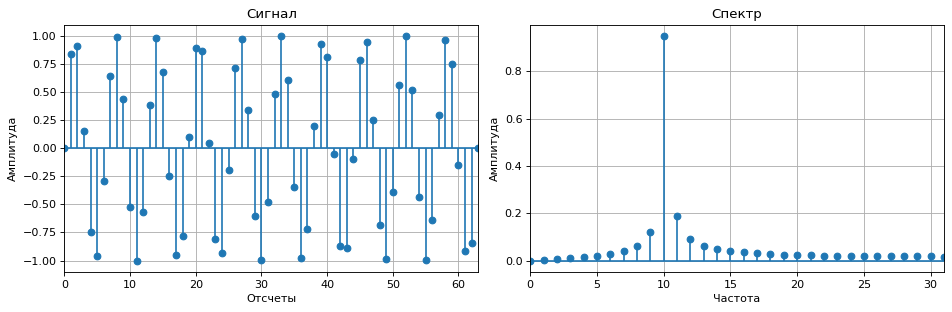

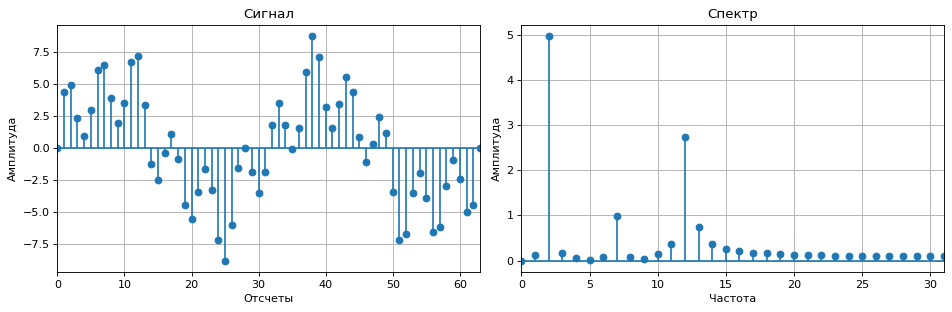

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft


# Количество отсчетов
N = 64
# Временные отсчеты
t = np.linspace(0, 1, N)

# Гармонический сигнал
y1 = np.sin(2*np.pi*10*t)

# ДПФ
Y1 = fft(y1)
# Нормировка
X1 = 2*np.abs(Y1) / N

fig = plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Сигнал')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Спектр')
plt.stem(X1, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

# Сумма гармонических сигналов

y2 = 5 * np.sin(2*np.pi*2*t) + 1 * np.sin(2*np.pi*7*t) + 3 * np.sin(2*np.pi*12*t)
# ДПФ
Y2 = fft(y2)
# Нормировка
X2 = 2*np.abs(Y2) / N

fig = plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Сигнал')
plt.stem(y2, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Спектр')
plt.stem(X2, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

Восстановим гармонические сигналы по их спектру.

Для этого зададим длину БПФ `N = 32` отсчёта. Рассмотрим, что происходит при вычислении ОБПФ `ifft` для сигналов, которые заданы в частотной области в виде единичного отсчета на определенной позиции.

Обратите внимание, что вычисляется прямое БПФ, поскольку операции БПФ и ОБПФ равнозначны и отличаются на константу и знак в поворачивающих множителях.

Спектром сигнала называется совокупность гармонических колебаний, из которых состоит сам сигнал.

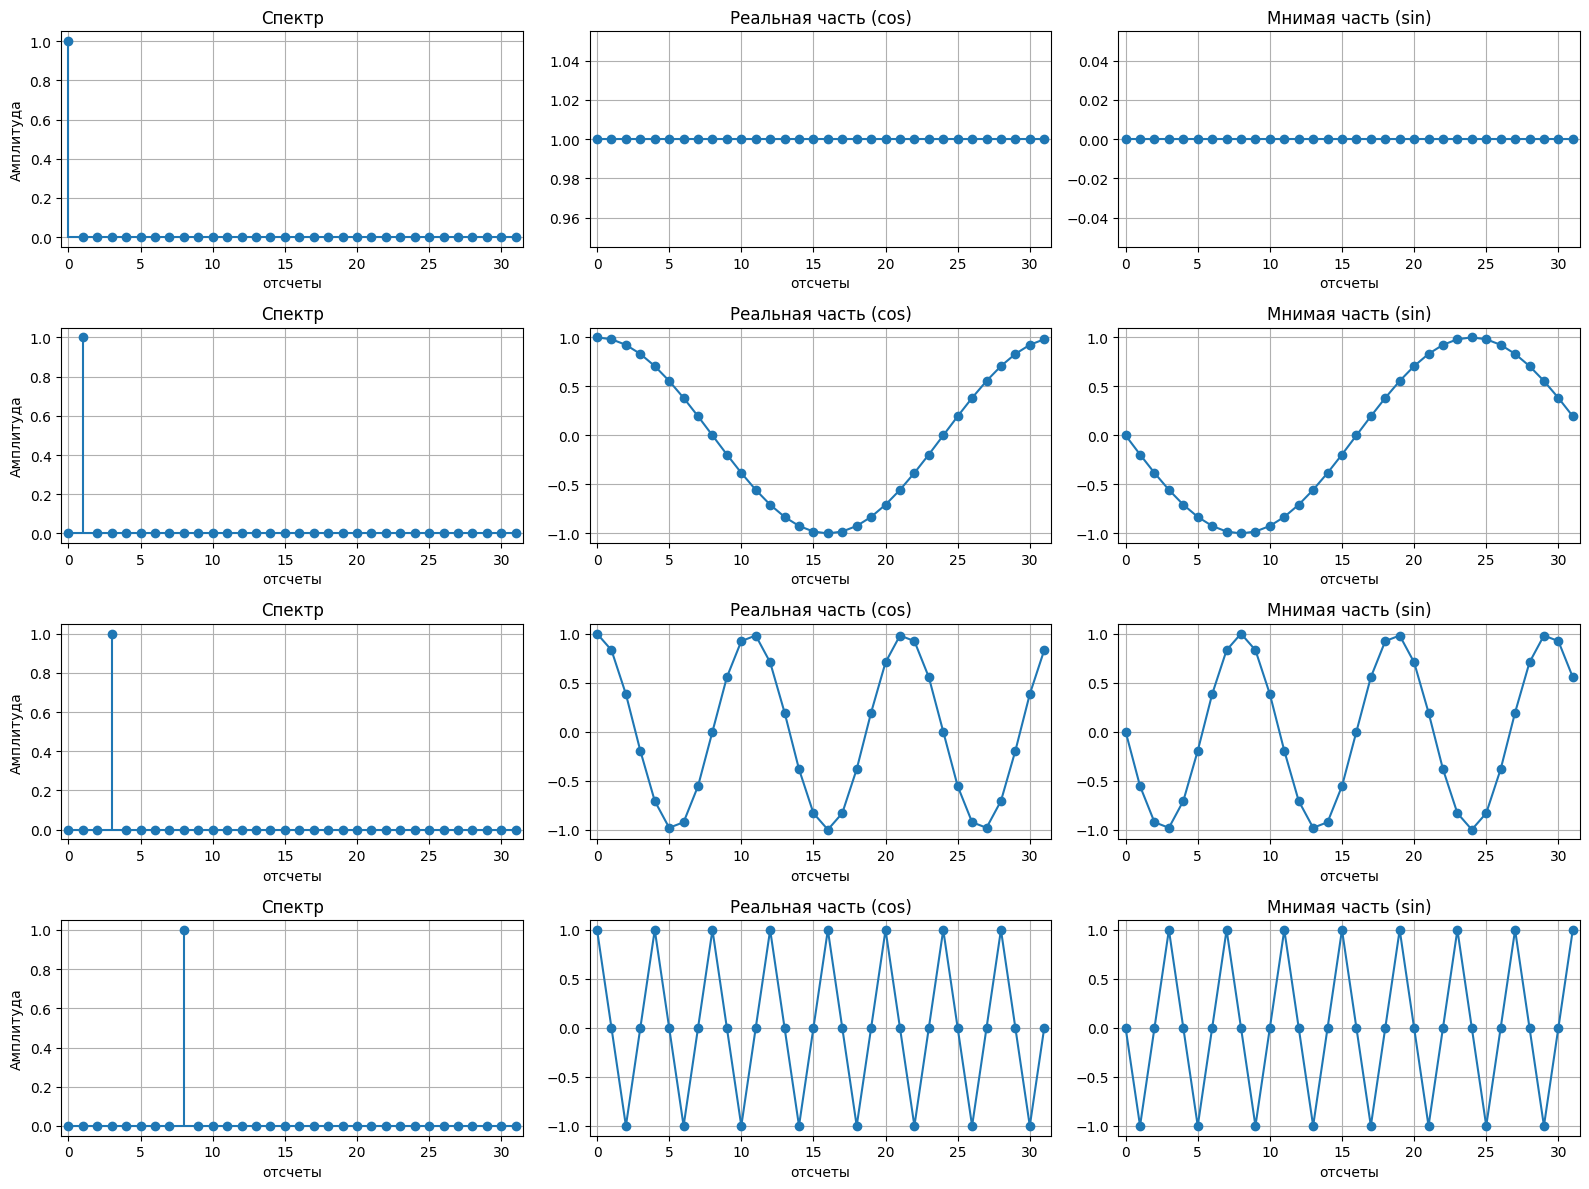

In [84]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft


# Зададим матрицу M на N, в которой будут отсчеты спектров сигналов, представленные в виде единичного отсчета на определенной позиции
N, M = 32, 4
# Задаем сигнал в частотной области
x = np.zeros((N,M))
x[0][0] = 1
x[1][1] = 1
x[3][2] = 1
x[8][3] = 1

X = fft(x, axis=0)

fig = plt.figure(figsize=(16, 12), dpi=100)
for i in range(M*3):
    plt.subplot(4, 3, i+1)
    if i % 3 == 0:
        plt.title('Спектр')
        plt.stem(x[:,i//3], use_line_collection=True, basefmt='C0')
        plt.ylabel('Амплитуда')
    if (i-1) % 3 == 0:
        plt.title('Реальная часть (cos)')
        plt.plot(np.real(X[:,i//3]), '-o')
    if (i-2) % 3 == 0:
        plt.title('Мнимая часть (sin)')
        plt.plot(np.imag(X[:,i//3]), '-o')
    plt.xlim([-0.5, N-0.5])
    plt.xlabel('отсчеты')
    plt.grid()
plt.tight_layout()

### Преобразование Фурье в Python

Python библиотека [scipy](https://docs.scipy.org/doc/scipy/index.html) для вычисления различных преобразований Фурье (синусное, косинусное, прямое, обратное, многомерное, вещественное) содержит одноименный пакет [scipy.fft](https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft). Для импорта пакета в проект необходимо выполнить команду:

```python
from scipy.fft import *
```
или
```python
from scipy.fft import fft, ifft, fftshift, fftfreq
```

### Список нужных функций из пакета fftp:

**Быстрое преобразование Фурье**

| **Function** | **Description** |
| --- | --- |
| `fft(x[, n, axis, overwrite_x])`            | Прямое БПФ                          |
| `ifft(x[, n, axis, overwrite_x])`           | Обратное БПФ                        |
| `fft2(x[, shape, axes, overwrite_x])`       | Двумерное прямое БПФ                |
| `ifft2(x[, shape, axes, overwrite_x])`      | Двумерное обратное БПФ              |
| `fft2(x[, shape, axes, overwrite_x])`       | Многомерное прямое БПФ              |
| `ifft2(x[, shape, axes, overwrite_x])`      | Многомерное обратное БПФ            |
| `fftshift(x, axes=None)`                    | Перестраивает преобразование Фурье X путем сдвига нулевой частотной составляющей к центру массива |
| `fftfreq(n, d=1.0)`                         | Находит частоты в центре каждого «бина» на выходе `fft()`|
| `rfft(x[, n, axis, norm, overwrite_x, ...])`| Прямое БПФ вещественного сигнала    |

### Алгоритмы БПФ

Существует два основных метода вычисления БПФ по основанию 2 (Radix-2): с прореживанием по частоте и по времени.

#### БПФ с прореживанием по времени»

**FFT Decimation-in-time [DIT]**

Идея заключается в том, что исходная последовательность отсчётов $x(n)$ с длиной N разбивается на две последовательности $x_0(n)$ и $x_1(n)$ равной длины $N/2$.

Причем $x_0(n)$ - последовательность четных отсчетов - 

$x_0(n) = x(2n), n = 0, ..., N/2 - 1$  

а $x_1(n)$ - последовательность нечетных отсчетов -  

$x_1(n) = x(2n+1), n = 0, ..., N/2 - 1$

Основные правило вычисления БПФ - разбиения последовательности на четные и нечетные.

**Алгоритм**:
- осуществить двоично-инверсную перестановку отсчетов входного сигнала, обеспечив разбиение исходной последовательности;
- сделать $N/2$ операций «Бабочка» для получения первого объединения, используя поворотные коэффициенты;
- повторить операцию «Бабочка» для перехода на следующие этапы, также используя поворотные коэффициенты.

После всех вышеописанных действий получим на выходе ДПФ входной последовательности. 

Алгоритм БПФ с прореживанием по времени с формулами и картинками можно еще раз посмотреть на [dsplib.org](https://ru.dsplib.org/content/fft_dec_in_time/fft_dec_in_time.html)

**«Бабочка»** - направленный граф, с помощью которого вычисляется пара комплексных отсчетов по предыдущим значениям. Для БПФ с прореживанием  бабочка по основанию 2 записывается по формуле:

$ X = A + B\cdot W^{-k}_{N}$ 

$ Y = A - B\cdot W^{-k}_{N}$ 

Подробнее см. [wiki](https://ru.wikipedia.org/wiki/Бабочка_(БПФ)), [Стивен В. Смит Руководство для ученых и инженеров по цифровой обработке сигналов](http://www.dspguide.com/ch12/2.htm), 

#### БПФ с прореживанием по частоте

**FFT Decimation-in-frequency [DIF]** 

Последовательность отсчётов $x(n)$ с длиной N разбивается на две последовательности $x_0(n)$ и $x_1(n)$ равной длины $N/2$. 

Причем $x_0(n)$ - последовательность первой половины данных $x_0(n) = x(n), n = 0, ..., N/2 - 1$, а $x_1(n)$ - последовательность второй половины данных x_1(n) = x(n), n = N/2, ..., N - 1$

Принципиальная разница алгоритмов в том, что при прореживании  умножение на поворотные коэффициенты  производилось после ДПФ четной и нечетной последовательности, а при использовании децимации по частоте умножение производится до ДПФ.  

**Алгоритм**:
- сделать N/2 операций «Бабочка» для получения первого объединения, используя поворотные коэффициенты;
- повторить операцию «Бабочка» для перехода на следующие этапы, также используя поворотные коэффициенты.
- осуществить двоично-инверсную перестановку результирующего сигнала; 

Бабочка в этом случае выглядит несколько иначе:

$ X = A + B$ 

$ Y = (A - B)\cdot W^{-k}_{N}$ 

В алгоритме БПФ с децимацией по времени производилось разделение исходного сигнала в соответствии с двоично-инверсной перестановкой – на четные и нечетные части. Тем самым получем первую и вторую половину спектра. В алгоритме с прореживанием по частоте наоборот, исходный сигнал делится пополам, а на выходе получаются две последовательности спектральных отсчетов – четная и нечетная (поэтому алгоритм и называется «прореживание по частоте»). 

Алгоритм БПФ с прореживанием по частоте с формулами и картинками можно еще раз посмотреть на [dsplib.org](https://ru.dsplib.org/content/fft_dec_in_freq/fft_dec_in_freq.html)

## Эффект Гиббса

Вносимые пульсации в области резких перепадов сигнала связаны с **эффектом Гиббса**. Этот эффект связан с последовательным приближением к исходной форме в виде частичных сумм ряда Фурье. Иными словами, природа пульсаций в восстанавливаемом сигнале напрямую связана с эффекта Гиббса.  Эффект Гиббса ярко выражен при резких нарушениях монотонности функции. На резких перепадах и скачках этот эффект максимален.

На рисунке ниже представлен график восстановления линейного сигнала с помощью частичной суммы ряда Фурье при разных значениях количества суммарных отсчетов.

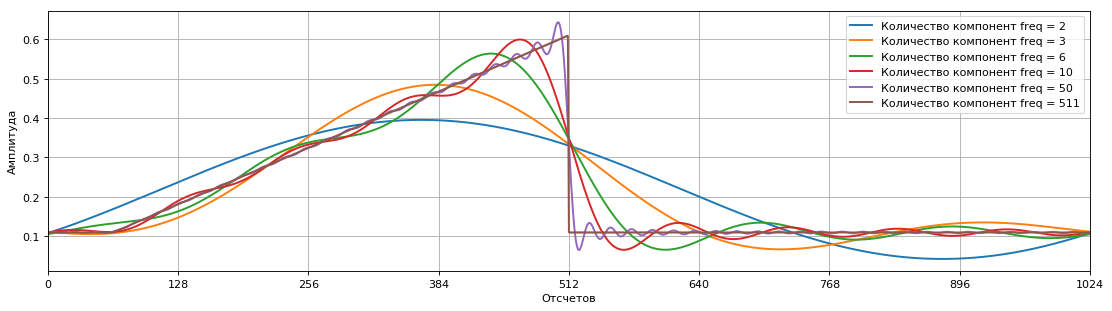

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft


# Количество отсчетов
N = 1024
# Создаем входной сигнал
x = np.zeros(N)
x[64:512] = np.linspace(0, 1, 512-64)

# Преобразование Фурье
X = fft(x, N)

# Разные значениях количества компонент частоты (гармоники)
l_freqs = (2, 3, 6, 10, 50, N//2-1)


plt.figure(figsize=(14, 4), dpi=80)
plt.xlabel('Отсчетов')
plt.ylabel('Амплитуда')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
for i, j in enumerate(l_freqs):
    K = X.copy()
    K[j:] = 0
    k = np.real(ifft(K))
    plt.plot(k, color='C'+str(i), linewidth=1.75, label='Количество компонент freq = {}'.format(l_freqs[i]))
plt.grid()
plt.legend()
plt.tight_layout()

### Применение

Можно выделить следующие области применения ДПФ:
* цифровой спектральный анализ
  * анализаторы спектра
  * обработка речи
  * обработка изображений
  * распознавание образов
* проектирование фильтров
  * вычисление импульсной характеристики по частотной
  * вычисление частотной характеристики по импульсной
* быстрое преобразование Фурье (БПФ) – простой алгоритм для эффективного вычисления ДПФ.
 
### Важное про ДПФ

* Периодический сигнал может быть разложен на сумму выбранных должным образом косинусоидальных и синусоидальных функций (Жан Батист Жозеф Фурье, 1807).
  
* ДПФ работает с конечным числом (N) оцифрованных по времени отсчетов X(m). Когда эти группы отсчетов повторяются, они становятся периодическими с точки зрения преобразования.
  
* Комплексный спектральный выход ДПФ C(k) является результатом свертки входных отсчетов с базисными функциями синуса и косинуса

## Задания

### 0 Заполнить данные в окне ниже
(для этого необходимо кликнуть два раза на текст ниже)

ФИО:

Группа:

Номер студенческого билета:

### 1 Подключить необходимые библиотеки

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift

%matplotlib inline

Рассчитаем преобразование Фурье и отобразим спектр, реальную часть и мнимую часть

### 2 Реализовать сигнал согласно номеру в журнале студентов (если такого нет, то по последней цифре номера студенческого билета от 0 до 30)

Список сигналов и точек для БПФ:

0   $y=\sin(x)+\cos(5x)$	$N=8$     

1	$y=\cos(3x)-\sin(2x)$	$N=8$    

2	$y=\sin(3x)+\cos(x)$	$N=16$

3	$y=\cos(x)+\sin(5x)$	$N=32$    

4	$y=\sin(2x)+\cos(7x)$	$N=64$  

5	$y=\cos(2x)+\sin(x)$	    $N=8$     

6	$y=\sin(x)+\cos(4x)$	$N=16$  

7	$y=\cos(5x)+\sin(6x)$	$N=32$     

8	$y=\sin(5x)+\cos(x)$	$N=64$     

9	$y=\cos(x)+\sin(2x)$	$N=8$    

10	$y=\sin(3x)+\cos(x)$	$N=16$     

11	$y=\cos(5x)+\sin(x)$	$N=32$     

12	$y=\sin(x)+\cos(5x)$	$N=8$   

13	$y=\cos(3x)+\sin(2x)$	$N=64$     

14	$y=\sin(3x)+\cos(x)$	$N=32$    

15	$y=\cos(2x)+\sin(5x)$	$N=16$     

16	$y=\sin(2x)+\cos(7x)$	$N=8$     

17	$y=\cos(x)+\sin(x)$	    $N=64$     

18	$y=\sin(x)+\cos(4x)$	$N=32$    

19	$y=\cos(5x)+\sin(6x)$	$N=16$     

20	$y=\sin(5x)+\cos(x)$	$N=8$    

21	$y=\cos(x)+\sin(2x)$	$N=64$    

22	$y=\sin(2x)+\cos(x)$	$N=32$     

23	$y=\cos(5x)+\sin(x)$	$N=16$    

24	$y=\sin(x)+\cos(5x)$	$N=8$    

25	$y=\cos(6x)+\sin(4x)$	$N=16$     

26	$y=\sin(6x)+\cos(2x)$	$N=8$    

27	$y=\cos(4x)+\sin(3x)$	$N=64$     

28	$y=\sin(4x)+\cos(5x)$	$N=32$    

29	$y=\cos(3x)+\sin(2x)$	$N=16$    

30  $y=\cos(7x)+\sin(3x)$   $N=32$   

31  $y=\cos(3x)+\sin(2x)$	$N=8$  

32  $y=\sin(4x)+\cos(4x)$	$N=16$

33  $y=\sin(2x)+\cos(x)$	$N=8$

34  $y=\sin(x)+\cos(2x)$	$N=64$

35  $y=\sin(7x)+\cos(3x)$	$N=32$

36  $y=\sin(2x)+\cos(4x)$	$N=8$

37  $y=\sin(6x)+\cos(8x)$	$N=32$

38  $y=\sin(8x)+\cos(3x)$	$N=32$

39  $y=\sin(x)+\cos(2x)$	$N=16$

40   $y=\sin(2x)+\cos(x)$	$N=8$

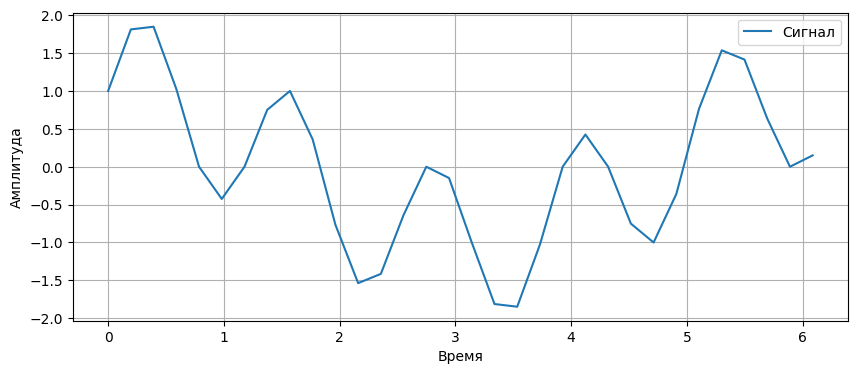

In [8]:
# Код
#3-последняя цифра номера студенческого билета
#кол-во отсчетов
N = 32
# Временные отсчеты
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
#сам сигнал
y = np.cos(x)+np.sin(5*x)

#график
plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('')
plt.legend()
plt.grid()
plt.show()

### 3. Реализовать функции алгоритмов преобразования Фурье с прореживанием по времени для N

In [9]:
# Код
def fft_dit(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft_dit(x[0::2])
    odd = fft_dit(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]


### 4. Реализовать функции алгоритмов преобразования Фурье с прореживанием по частоте для N

In [10]:
# Код
def fft_dif(x):
    N = len(x)
    if N <= 1:
        return x
    half = N // 2
    even = fft_dif([x[k] + x[k + half] for k in range(half)])
    odd = fft_dif([(x[k] - x[k + half]) * np.exp(-2j * np.pi * k / N) for k in range(half)])
    return even + odd

### 5. Применить БПФ реализованные вами и применить указанный выше встроенный метод Python `fft()`

In [19]:
N = 32
x = np.linspace(0, 2 * np.pi, N)
y = np.cos(x) + np.sin(5 * x)

# Применение функции по частоте
X_dif = fft_dif(y)

# Применение функции по времени
X_dit = fft_dit(y)

#встроенный метод fft()
X_np = np.fft.fft(y)

### 6. Отобразить сигнал, ФЧХ и АЧХ для вашего сигнала применяя методы реализованные вами и встроенные функции

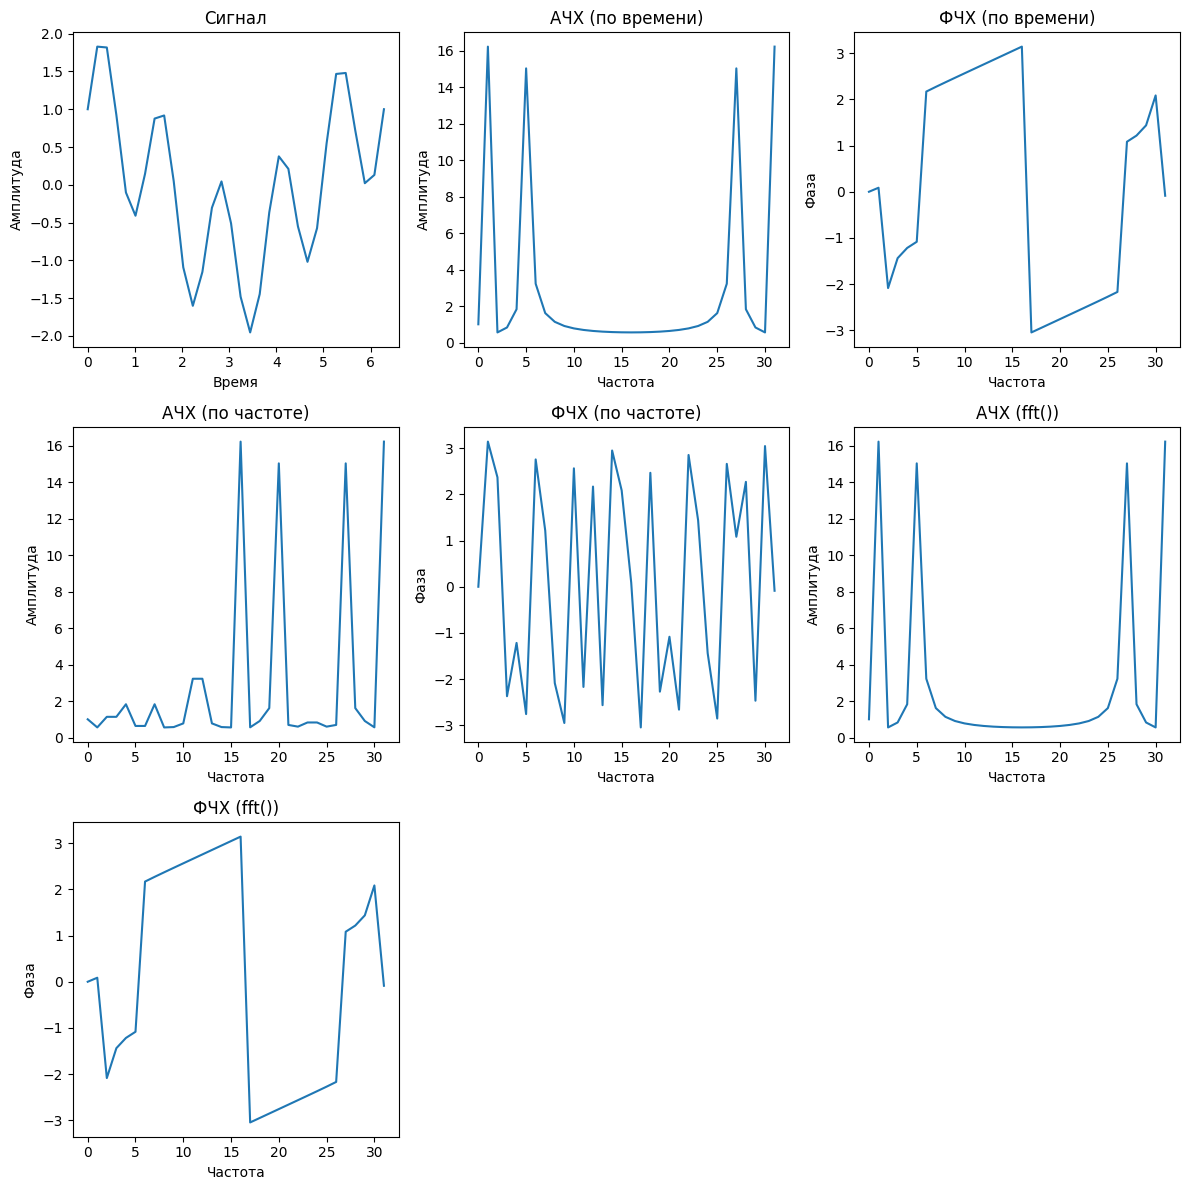

In [26]:
# Вычисление АЧХ и ФЧХ
def calculate_fchx_achx(X):
    achx = np.abs(X)
    fchx = np.angle(X)
    return achx, fchx

# Вычисление АЧХ и ФЧХ для всех методов
achx_dit, fchx_dit = calculate_fchx_achx(X_dit)
achx_dif, fchx_dif = calculate_fchx_achx(X_dif)
achx_np, fchx_np = calculate_fchx_achx(X_np)

# Графики
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.plot(x, y)
plt.title('Сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

# Отображение АЧХ и ФЧХ для DIT FFT
plt.subplot(3, 3, 2)
plt.plot(achx_dit)
plt.title('АЧХ (по времени)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(3, 3, 3)
plt.plot(fchx_dit)
plt.title('ФЧХ (по времени)')
plt.xlabel('Частота')
plt.ylabel('Фаза')

# Отображение АЧХ и ФЧХ для DIF FFT
plt.subplot(3, 3, 4)
plt.plot(achx_dif)
plt.title('АЧХ (по частоте)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(3, 3, 5)
plt.plot(fchx_dif)
plt.title('ФЧХ (по частоте)')
plt.xlabel('Частота')
plt.ylabel('Фаза')

# Отображение АЧХ и ФЧХ для NumPy FFT
plt.subplot(3, 3, 6)
plt.plot(achx_np)
plt.title('АЧХ (fft())')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(3, 3, 7)
plt.plot(fchx_np)
plt.title('ФЧХ (fft())')
plt.xlabel('Частота')
plt.ylabel('Фаза')

plt.tight_layout()
plt.show()

### 7. Сравнить полученные результаты, что получилось?
(для ответа кликнуть два раза на окно ниже)

ОТВЕТ:
АЧХ и ПЧХ (по времени) совпадают с АЧХ И ФЧХ по встроенной функции numpy fft()

### 8. Восстановить сигнал применив ОДПФ указанный выше встроенный метод Python `ifft()` (ОДПФ применяется к результатам полученным с помощью реализованных вами функций и встроенным методом)

In [27]:
# Код
y_dit_restored = np.fft.ifft(X_dit)
y_dif_restored = np.fft.ifft(X_dif)
y_np_restored = np.fft.ifft(X_np)

### 9. Отобразить полученные результаты

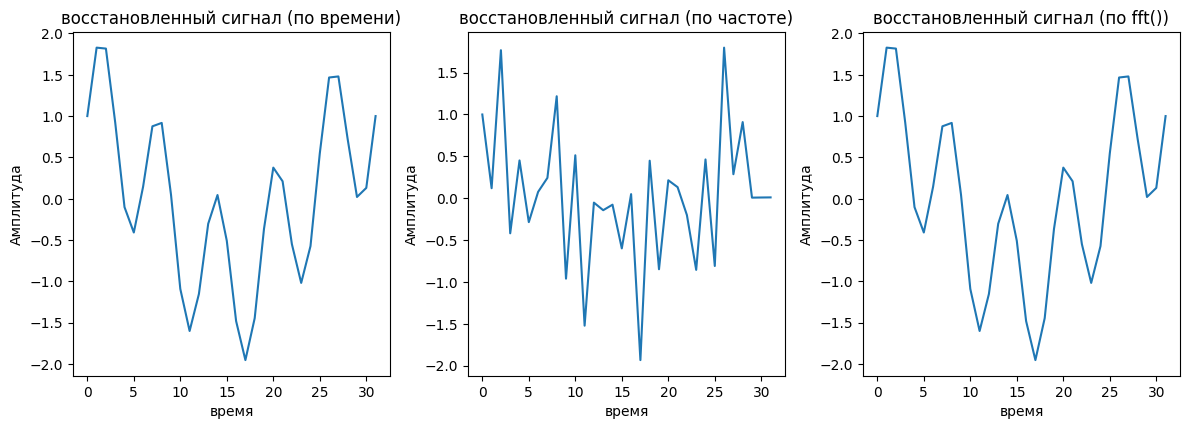

In [35]:
# Код
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.plot(y_dit_restored)
plt.title('восстановленный сигнал (по времени)')
plt.xlabel('время')
plt.ylabel('Амплитуда')

plt.subplot(3, 3, 2)
plt.plot(y_dif_restored)
plt.title('восстановленный сигнал (по частоте)')
plt.xlabel('время')
plt.ylabel('Амплитуда')

plt.subplot(3, 3, 3)
plt.plot(y_np_restored)
plt.title('восстановленный сигнал (по fft())')
plt.xlabel('время')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

### 10. Что получилось?
(для ответа кликнуть два раза на окно ниже)

ответ: 
снова совпадает по вермени и по fft()

## Выводы

Выводы: 
Преобразование Фурье позволяет переходить от временной области к частотной и обратно, что особенно полезно для анализа сигналов.
Сравнение с встроенными функциями Python подтвердило корректность разработанных алгоритмов и их соответствие теоретическим основам.